In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())
import pickle
from testsuite.utilities import Pareto_split
import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# plt.style.use('seaborn')
# import matplotlib.cm as cm
from testsuite.analysis import plot_pareto_2d, plot_all_pareto_2d

In [2]:
def load_all(directory):
    paths = [file for file in os.listdir(directory) if file[-4:] == ".pkl"]
    combined_resuts = {}
    for log_path in paths:
        result = pickle.load(open(os.path.join(directory, log_path), "rb"))
        for key, value in result.items():
            try:
                combined_resuts[key] += [value]
            except KeyError:
                combined_resuts[key] = [value]
                
    return combined_resuts

In [3]:
path = os.path.join(rootpath.detect(), "experiments/saf_vs_smsego/log_data/test_function_Saf_init10_MultiSurrogate_GP_saf_mean/")
saf_mu_results = load_all(path)

path = os.path.join(rootpath.detect(), "experiments/saf_vs_smsego/log_data/test_function_Saf_init10_MultiSurrogate_GP_saf_ei/")
saf_ei_results = load_all(path)

path = os.path.join(rootpath.detect(), "experiments/saf_vs_smsego/log_data/test_function_SmsEgo_init10_MultiSurrogate_GP_smsego_mean/")
sms_mu_results = load_all(path)

path = os.path.join(rootpath.detect(), "experiments/saf_vs_smsego/log_data/test_function_SmsEgo_init10_MultiSurrogate_GP_smsego_ei/")
sms_ei_results = load_all(path)

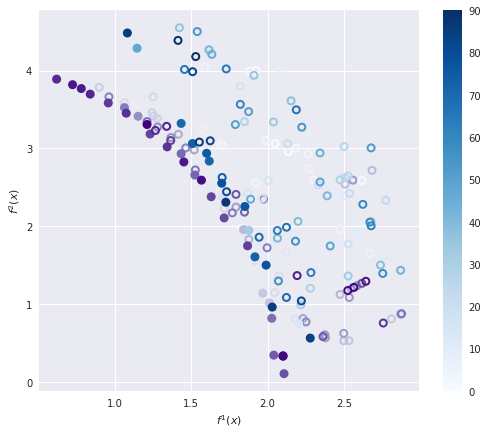

In [4]:
fig_safmu = plot_all_pareto_2d(saf_mu_results)

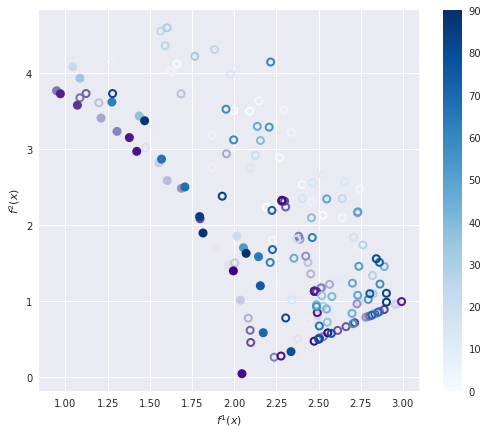

In [5]:
fig_safei = plot_all_pareto_2d(saf_ei_results)

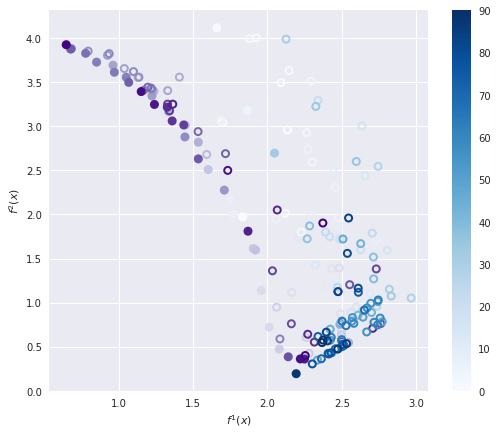

In [6]:
fig_smsmu = plot_all_pareto_2d(sms_mu_results)

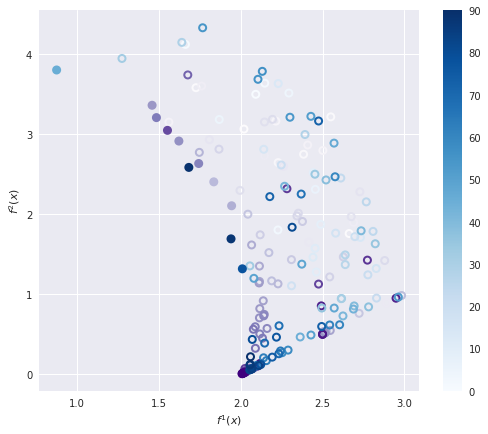

In [7]:
fig_smsmei= plot_all_pareto_2d(sms_ei_results)

In [69]:
import matplotlib.pyplot as plt
def plot_hypervolume(results, axis=None, label=None, plot_individuals=False, color="C0"):
    if axis is None:
        fig = plt.figure(figsize=[12, 8]) 
        axis = fig.gca()
    
    
    hvs = results["hypervolume"]
    
    if plot_individuals:
        for i, hv in enumerate(hvs):
            # plot idividual results
            n_inital = results["n_initial"][i]
            n_total = results["n_evaluations"][i]
            bo_steps = range(n_inital, n_total+1)
            axis.plot(bo_steps, hv, linestyle=":", c=color, alpha=0.4)
        
        # trim hvs to min length so as to compute mean
        array_hvs = np.array([hv[:min([len(hv) for hv in hvs])] for hv in hvs])
        # plot mean and standard deviations
        axis.plot(bo_steps, np.mean(array_hvs, axis=0), linestyle="-", c=color, alpha=1., label=label)
        axis.fill_between(bo_steps, np.mean(array_hvs, axis=0)-np.std(array_hvs, axis=0), np.mean(array_hvs, axis=0)+np.std(array_hvs, axis=0),
                        color=color, alpha=0.2)
   
    if axis is None:
        return fig          

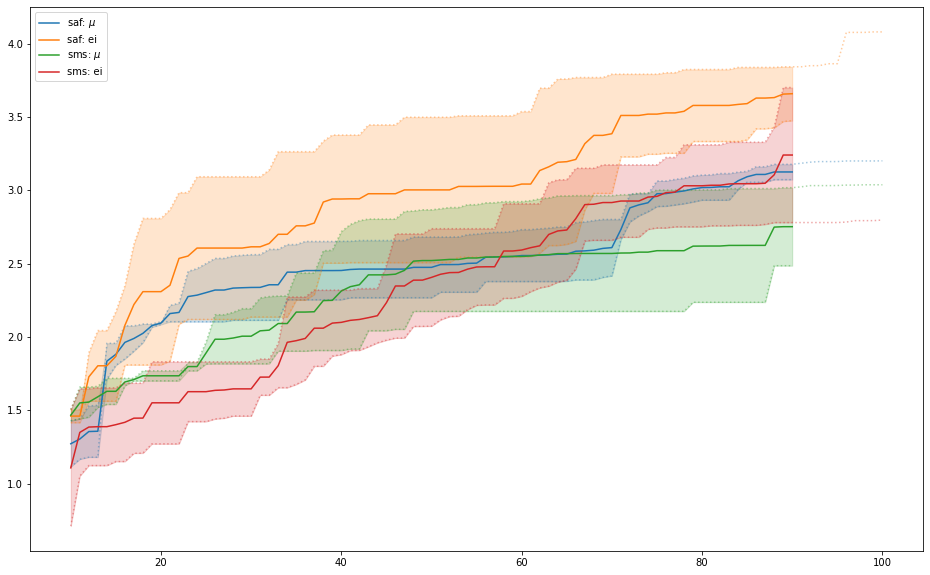

In [71]:
fig_hv = plt.figure(figsize=[16, 10])
ax_hv = fig_hv.gca()
plot_hypervolume(saf_mu_results, axis=ax_hv, plot_individuals=True, label="saf: $\mu$", color="C0")
plot_hypervolume(saf_ei_results, axis=ax_hv, plot_individuals=True, label="saf: ei", color="C1")
plot_hypervolume(sms_mu_results, axis=ax_hv, plot_individuals=True, label="sms: $\mu$", color="C2")
plot_hypervolume(sms_ei_results, axis=ax_hv, plot_individuals=True, label="sms: ei", color="C3")
ax_hv.legend()

In [65]:
hvs = np.asarray(saf_ei_results["hypervolume"])

In [32]:
np.shape(hvs[0])

(91,)